<a href="https://colab.research.google.com/github/Valerie-Fan/python-data-analysis-and-machine-learning/blob/main/dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('/content/Insurance_dataset.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1.0,< 1 Year,No,2630.0,152.0,16.0,0.0
1,17163,Male,42,1,28.0,0.0,1-2 Year,Yes,43327.0,26.0,135.0,0.0
2,32023,Female,66,1,33.0,0.0,1-2 Year,Yes,35841.0,124.0,253.0,0.0
3,87447,Female,22,1,33.0,0.0,< 1 Year,No,27645.0,152.0,69.0,0.0
4,501933,Male,28,1,46.0,1.0,< 1 Year,No,29023.0,152.0,211.0,0.0


In [7]:
# data assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55904 entries, 0 to 55903
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    55904 non-null  int64  
 1   Gender                55904 non-null  object 
 2   Age                   55904 non-null  int64  
 3   Driving_License       55904 non-null  int64  
 4   Region_Code           55903 non-null  float64
 5   Previously_Insured    55903 non-null  float64
 6   Vehicle_Age           55903 non-null  object 
 7   Vehicle_Damage        55903 non-null  object 
 8   Annual_Premium        55903 non-null  float64
 9   Policy_Sales_Channel  55903 non-null  float64
 10  Vintage               55903 non-null  float64
 11  Response              55903 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 5.1+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [28]:
# dealing with null
df.dropna(inplace=True)
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Q1: Which kind of data selection method will you use to split csv data to training and testing datasets?
I would use a random selection method for the following reasons:
*   **Independence**: Random sampling helps ensure that the training and testing sets are independent of each other, which is crucial for unbiased model evaluation.
*   **Distribution Consistency**: Randomly splitting the dataset helps maintain a consistent distribution of features and target outcomes in both the training and testing sets.
*   **Preventing Data Leakage**: Sequential splitting could inadvertently lead to data leakage if the data has some form of temporal or ordered structure that the model could exploit.
*   **Model Robustness**: Using a random split helps in testing the model's robustness by ensuring it performs well across different subsets of data, which might not be the case if the data is split sequentially, especially if the sequence has an underlying pattern or trend.





In [ ]:


# Set the random seed for reproducibility
random_seed = 42

# Splitting the dataset into training and testing sets (80% training, 20% testing)
train_set, test_set = train_test_split(df, test_size=0.20, random_state=random_seed)

# Display the shape of the training and testing sets
train_set.shape, test_set.shape

((305723, 12), (76431, 12))

## Q2: Which two evaluation metrics would you choose? Why?
Beyond the basic metrics like the confusion matrix and accuracy score, the two additional metrics I would choose are Precision and Recall. The following are the reasons:
*   **Balancing Precision and Recall**: In many business scenarios, especially in insurance, balancing the cost of false positives (wasting resources on uninterested customers) and the risk of false negatives (missing out on potential customers) is necessary. Precision and recall provide insights into these aspects.
*   **Focus on Customer Conversion**: These metrics help in fine-tuning the model specifically to optimize customer outreach strategies, improving overall efficiency and effectiveness.



## Q3: Finding best parameters settings.


In [29]:
from sklearn.model_selection import train_test_split

# Assuming 'insurance_data' is your original DataFrame
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
# Define a column transformer for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols),
    ])

### Logistic Regression

In [64]:
# Create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Set up GridSearchCV
param_grid = {
    'classifier__C': [1, 10, 20],
    'classifier__solver': ['liblinear', 'lbfgs']
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ......classifier__C=1, classifier__solver=liblinear; total time=   0.2s
[CV] END ......classifier__C=1, classifier__solver=liblinear; total time=   0.2s
[CV] END ......classifier__C=1, classifier__solver=liblinear; total time=   0.2s
[CV] END ..........classifier__C=1, classifier__solver=lbfgs; total time=   0.2s
[CV] END ..........classifier__C=1, classifier__solver=lbfgs; total time=   0.3s
[CV] END ..........classifier__C=1, classifier__solver=lbfgs; total time=   0.2s
[CV] END .....classifier__C=10, classifier__solver=liblinear; total time=   0.2s
[CV] END .....classifier__C=10, classifier__solver=liblinear; total time=   0.2s
[CV] END .....classifier__C=10, classifier__solver=liblinear; total time=   0.2s
[CV] END .........classifier__C=10, classifier__solver=lbfgs; total time=   0.2s
[CV] END .........classifier__C=10, classifier__solver=lbfgs; total time=   0.3s
[CV] END .........classifier__C=10, classifier__s

### K-Nearest Neighbors (K-NN)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline for K-NN with a preprocessor included
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Parameters grid for K-NN
knn_param_grid = {
    'knn__n_neighbors': [30, 50, 100],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Setting up the GridSearchCV for K-NN
knn_grid_search = GridSearchCV(estimator=knn_pipeline, param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2)

# Fitting the grid search to the data using a smaller sample for demonstration due to computation constraints
knn_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", knn_grid_search.best_params_)
print("Best score:", knn_grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 100, 'knn__weights': 'distance'}
Best score: 0.8899870113824454


### Support Vector Classifier (SVC)

In [23]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline for SVC with a preprocessor included
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', SVC(random_state=42))
])

# Parameters grid for SVC (simplified for demonstration)
svc_param_grid = {
    'svc__C': [1, 5, 10],
    'svc__kernel': ['rbf', 'linear'],  # 'poly' and 'sigmoid' can be computationally demanding
    'svc__gamma': ['scale', 'auto']  # 'scale' uses 1 / (n_features * X.var()) as value of gamma
}

# Setting up the GridSearchCV for SVC
svc_grid_search = GridSearchCV(estimator=svc_pipeline, param_grid=svc_param_grid, cv=2, n_jobs=-1, verbose=2)

# Fitting the grid search to the data using a smaller sample for demonstration
svc_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", svc_grid_search.best_params_)
print("Best score:", svc_grid_search.best_score_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameters: {'svc__C': 5, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Best score: 0.8933858056437547


### Gaussian Naive Bayes (usually don't need parameter tuning)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Pipeline setup for Gaussian Naive Bayes
gnb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # The name here is 'classifier'
])

# Corrected Parameter grid for Gaussian Naive Bayes
gnb_param_grid = {
    'classifier__var_smoothing': np.logspace(0, -9, num=10)
}

# Setting up the GridSearchCV with the corrected parameter naming
gnb_grid_search = GridSearchCV(estimator=gnb_pipeline, param_grid=gnb_param_grid, cv=3, n_jobs=-1, verbose=2)
gnb_grid_search.fit(X_train, y_train)  # Ensure X_train is not preprocessed outside of this pipeline

# Output the best parameters and the best score
print("Best parameters:", gnb_grid_search.best_params_)
print("Best score:", gnb_grid_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'classifier__var_smoothing': 1.0}
Best score: 0.7882473848068802


### Multinomial Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Ensure correct application of MinMaxScaler
# Only apply it to features that are strictly positive. If all features are already non-negative, this step can be skipped.
preprocessor_mnb = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols),
    ], remainder='passthrough')

# Pipeline setup for Multinomial Naive Bayes
mnb_pipeline = Pipeline([
    ('preprocessor', preprocessor_mnb),
    ('mnb', MultinomialNB())
])

# Parameter grid for Multinomial Naive Bayes
mnb_param_grid = {
    'mnb__alpha': np.linspace(0.0, 2.0, 20)  # Exploring a range of alpha values
}

# Setting up the GridSearchCV
mnb_grid_search = GridSearchCV(estimator=mnb_pipeline, param_grid=mnb_param_grid, cv=3, n_jobs=-1, verbose=2)
mnb_grid_search.fit(X_train, y_train)

print("Best parameters:", mnb_grid_search.best_params_)
print("Best score:", mnb_grid_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'mnb__alpha': 1.263157894736842}
Best score: 0.7621528661795192


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols),
    ])

# Pipeline setup for Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Parameter grid for Decision Tree
dt_param_grid = {
    'dt__max_depth': [None, 10, 20, 30, 40, 50],
    'dt__min_samples_split': [2, 10, 20],
    'dt__min_samples_leaf': [1, 2, 4, 6, 8]
}

# Setting up the GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_pipeline, param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters:", dt_grid_search.best_params_)
print("Best score:", dt_grid_search.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best parameters: {'dt__max_depth': 10, 'dt__min_samples_leaf': 6, 'dt__min_samples_split': 2}
Best score: 0.8948392219100042


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Pipeline setup for Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

# Parameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],  # More estimators can be tested depending on computational resources
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

# Setting up the GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters:", rf_grid_search.best_params_)
print("Best score:", rf_grid_search.best_score_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'rf__max_depth': 10, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best score: 0.8981485391282074


### XGBoost

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Assuming 'preprocessor' is already defined and set up appropriately
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Parameter grid for XGBoost
xgb_param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.5, 0.7, 1.0],
    'xgb__colsample_bytree': [0.5, 0.7, 1.0]
}

# Setting up the GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters:", xgb_grid_search.best_params_)
print("Best score:", xgb_grid_search.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'xgb__colsample_bytree': 0.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
Best score: 0.8979696642511837


## Q4: Which prediction model is the best between these eight classification models? WHY?

### Accuracy, presicion, recall, and f1-score

In [67]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Function to adjust parameter keys
def adjust_params(params):
    return {key.split('__')[-1]: value for key, value in params.items()}

# Best_params dictionary
best_params = {
    'Logistic Regression': {'C': 1.0, 'solver': 'lbfgs'},
    'K-NN': {'knn__metric': 'manhattan', 'knn__n_neighbors': 100, 'knn__weights': 'distance'},
    'SVC': {'svc__C': 5, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'},
    'Gaussian Naive Bayes': {},  # Gaussian NB typically doesn't need parameter tuning
    'Multinomial Naive Bayes': {'mnb__alpha': 1.263157894736842},
    'Decision Tree': {'dt__max_depth': 10, 'dt__min_samples_leaf': 6, 'dt__min_samples_split': 2},
    'Random Forest': {'rf__max_depth': 10, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200},
    'XGBoost': {'xgb__colsample_bytree': 0.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
}

# Models
models = {
    'Logistic Regression': LogisticRegression(**adjust_params(best_params['Logistic Regression'])),
    'K-NN': KNeighborsClassifier(**adjust_params(best_params['K-NN'])),
    'SVC': SVC(**adjust_params(best_params['SVC'])),
    'Gaussian Naive Bayes': GaussianNB(),  # No parameters to adjust
    'Multinomial Naive Bayes': MultinomialNB(**adjust_params(best_params['Multinomial Naive Bayes'])),
    'Decision Tree': DecisionTreeClassifier(**adjust_params(best_params['Decision Tree'])),
    'Random Forest': RandomForestClassifier(**adjust_params(best_params['Random Forest'])),
    'XGBoost': XGBClassifier(**adjust_params(best_params['XGBoost']), use_label_encoder=False, eval_metric='logloss')
}

# Define models with a general preprocessor
models_general = ['Logistic Regression', 'K-NN', 'SVC', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
models_mnb = ['Multinomial Naive Bayes']

# Dictionary to hold scores
scores = {}

# Evaluate models
for name, model in models.items():
    if name in models_mnb:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor_mnb),
                                   ('model', model)])
    else:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    scores[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print results
for name, metrics in scores.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Logistic Regression:
  Accuracy: 0.8770
  Precision: 0.6850
  Recall: 0.4618
  F1 Score: 0.5517
K-NN:
  Accuracy: 0.8910
  Precision: 0.8519
  Recall: 0.4050
  F1 Score: 0.5490
SVC:
  Accuracy: 0.8955
  Precision: 0.9140
  Recall: 0.4001
  F1 Score: 0.5566
Gaussian Naive Bayes:
  Accuracy: 0.6987
  Precision: 0.3503
  Recall: 0.9814
  F1 Score: 0.5163
Multinomial Naive Bayes:
  Accuracy: 0.7602
  Precision: 0.3934
  Recall: 0.8548
  F1 Score: 0.5388
Decision Tree:
  Accuracy: 0.8954
  Precision: 0.9077
  Recall: 0.4028
  F1 Score: 0.5580
Random Forest:
  Accuracy: 0.9001
  Precision: 1.0000
  Recall: 0.3903
  F1 Score: 0.5614
XGBoost:
  Accuracy: 0.8995
  Precision: 0.9903
  Recall: 0.3903
  F1 Score: 0.5599


In this scenario,  where "recall" is prioritized (since we do not want to miss any client who would possibly interested in the insurance), the best model is the one that achieves the highest recall rate without completely sacrificing other metrics like accuracy, precision, and F1 score. Recall measures the model's ability to identify all relevant instances correctly, which is critical in scenarios where failing to detect true positives can have serious consequences. <br>

### Comparing accuracy and recall

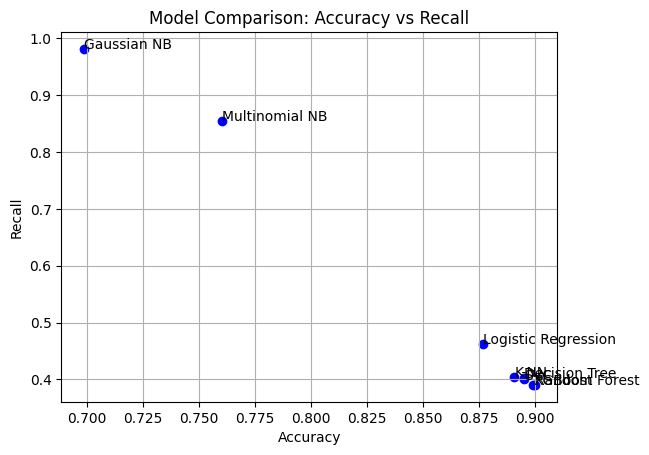

In [68]:
import matplotlib.pyplot as plt

# Names of the models
model_names = ['Logistic Regression', 'K-NN', 'SVC', 'Gaussian NB', 'Multinomial NB', 'Decision Tree', 'Random Forest', 'XGBoost']

# Recall for each model
recall_scores = [0.4618, 0.4050, 0.4001, 0.9814, 0.8548, 0.4028, 0.3903, 0.3903]

# Accuracy for each model
accuracy_scores = [0.8770, 0.8910, 0.8955, 0.6987, 0.7602, 0.8954, 0.9001, 0.8995]

fig, ax = plt.subplots()
ax.scatter(accuracy_scores, recall_scores, color='blue')
for i, txt in enumerate(model_names):
    ax.annotate(txt, (accuracy_scores[i], recall_scores[i]))
plt.title('Model Comparison: Accuracy vs Recall')
plt.xlabel('Accuracy')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

### Conclusion

*   **Gaussian Naive Bayes** is the best model in this scenario if the priority is to capture as many positive instances as possible, and the cost of false positives is relatively low.
*   **Multinomial Naive Bayes** provides a good balance by achieving high recall (0.8548) with better accuracy (0.7602) and precision (0.3934) compared to Gaussian Naive Bayes. If some trade-off is acceptable, this might be a better choice than Gaussian Naive Bayes.



## Q5: Using the best prediction model to get the "Response"

### Preprocess validation dataset

In [79]:
# import validation dataset
validation_data = pd.read_csv('/content/Insurance_validation.csv')
validation_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,Female,34,1,39.0,1,1-2 Year,No,38244.0,124.0,146
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,37577.0,122.0,109
2,117823,Male,39,1,28.0,1,1-2 Year,No,24578.0,26.0,63
3,213992,Male,28,1,50.0,1,1-2 Year,No,40507.0,8.0,129
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,36783.0,152.0,201


In [80]:
# data preparing
validation_data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [81]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78273 non-null  int64  
 1   Gender                78273 non-null  object 
 2   Age                   78273 non-null  int64  
 3   Driving_License       78273 non-null  int64  
 4   Region_Code           78273 non-null  float64
 5   Previously_Insured    78273 non-null  int64  
 6   Vehicle_Age           78273 non-null  object 
 7   Vehicle_Damage        78273 non-null  object 
 8   Annual_Premium        78273 non-null  float64
 9   Policy_Sales_Channel  78273 non-null  float64
 10  Vintage               78273 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 6.6+ MB


In [82]:
validation_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000
mean,233993.913827,38.507570,0.997866,26.381434,0.488917,30707.042441,111.993216,154.827220
std,139265.743227,15.216589,0.046141,13.149780,0.499880,17044.185877,54.270018,83.476632
min,2.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,115579.000000,25.000000,1.000000,15.000000,0.000000,24548.000000,26.000000,83.000000
50%,229110.000000,36.000000,1.000000,28.000000,0.000000,31741.000000,150.000000,155.000000
75%,344739.000000,49.000000,1.000000,35.000000,1.000000,39476.000000,152.000000,227.000000
max,508136.000000,85.000000,1.000000,52.000000,1.000000,489663.000000,163.000000,299.000000


In [75]:
numerical_cols = validation_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = validation_data.select_dtypes(include=['object']).columns.tolist()

# implement maxminscalar() and one-hot encoding to validation dataset
validation_data[numerical_cols] = MinMaxScaler().fit_transform(validation_data[numerical_cols])
validation_data = pd.get_dummies(validation_data, columns=categorical_cols)

Here I choose to use multinomial naive bayes as my best model.

In [83]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor_mnb),('model', MultinomialNB(**adjust_params(best_params['Multinomial Naive Bayes'])))])

In [84]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['id', 'Age',
                                                   'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('model', MultinomialNB(alpha=1.263157894736842))])

In [85]:
y_pred = pipeline.predict(validation_data)

In [86]:
results = pd.DataFrame({
    'id': validation_data['id'],
    'Response': y_pred
})
results.to_csv('/content/result2.csv', index=False)